In [25]:
import numpy as np
import pandas as pd

In [26]:
data1 = pd.read_csv('headcount.csv')
data2 = pd.read_csv('leave.csv')

headcount = pd.DataFrame(data1)
leave = pd.DataFrame(data2)

In [27]:
headcount.shape

(9, 2)

In [28]:
leave.shape

(246, 7)

In [29]:
leave.head()

,Employee ID,Name,Location,Team,Termination Date,Termination Category,Reason
0,1181,Aairah Burt,United Kingdom,Technology,01/07/2021,Voluntary,Higher Pay
1,1355,Aaliya Reeves,United Kingdom,Clients,01/07/2021,Voluntary,Did not disclose
2,1070,Aamna Swanson,United Kingdom,Clients,01/07/2021,Voluntary,Higher Pay
3,1173,Abel Bradley,United Kingdom,Clients,01/07/2021,Voluntary,Career change
4,1345,Adil Norman,United Kingdom,Clients,02/07/2021,Voluntary,Career change


In [30]:
leave['Location'].unique()

array(['United Kingdom', 'Poland', 'United States of America'],
      dtype=object)

In [31]:
leave['Reason'].unique()

array(['Higher Pay', 'Did not disclose', 'Career change', 'Redundancy',
       'Moved', 'Dismissal'], dtype=object)

In [32]:
leave['Termination Category'].unique()

array(['Voluntary', 'Involuntary'], dtype=object)

In [118]:
new_data = pd.DataFrame()

In [119]:
new_data['Location'] = leave['Location']

In [120]:
new_data['Reason'] = leave['Reason']

In [121]:
new_data

,Location,Reason
0,United Kingdom,Higher Pay
1,United Kingdom,Did not disclose
2,United Kingdom,Higher Pay
3,United Kingdom,Career change
4,United Kingdom,Career change
...,...,...
241,United States of America,Career change
242,United States of America,Career change
243,United States of America,Higher Pay
244,United States of America,Higher Pay


In [122]:
new_data.groupby(['Location','Reason']).size()

Location                  Reason          
Poland                    Career change        6
                          Did not disclose     9
                          Dismissal            1
                          Higher Pay          42
                          Moved                8
                          Redundancy           3
United Kingdom            Career change       36
                          Did not disclose    30
                          Higher Pay          43
                          Moved                7
                          Redundancy           1
United States of America  Career change       15
                          Did not disclose    10
                          Dismissal            1
                          Higher Pay          25
                          Redundancy           9
dtype: int64

In [126]:
data = pd.DataFrame(new_data.groupby(['Location','Reason']).size().to_frame('size').unstack())

In [127]:
data = plot_data.fillna(0)

Text(0, 0.5, 'No. of employees left')

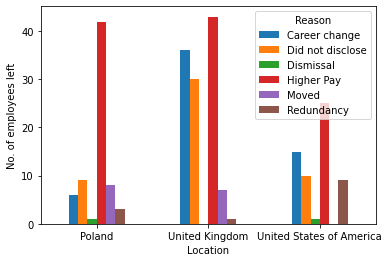

In [167]:
ax=data.plot.bar(rot=0)
ax.set_xlabel('Location')
ax.set_ylabel("No. of employees left")


In [168]:
headcount

,Organisation,Average Headcount
0,Clients,1095
1,Poland,334
2,UK,571
3,USA,190
4,Technology,526
5,Poland,236
6,UK,189
7,USA,101
8,Total,1621


In [172]:
headcount.groupby(['Organisation'])

In [176]:
avg = []

In [177]:
avg.append((headcount.loc[headcount['Organisation'] == 'Poland', 'Average Headcount'].sum())/2)

In [179]:
avg.append((headcount.loc[headcount['Organisation'] == 'UK', 'Average Headcount'].sum())/2)

In [180]:
avg.append((headcount.loc[headcount['Organisation'] == 'USA', 'Average Headcount'].sum())/2)

In [181]:
avg

[285.0, 380.0, 145.5]

In [182]:
vol_data = pd.DataFrame()

In [183]:
vol_data['Location'] = leave['Location']

In [184]:
vol_data['Termination'] = leave['Termination Category']

In [200]:
vol_data

,Location,Termination
0,United Kingdom,Voluntary
1,United Kingdom,Voluntary
2,United Kingdom,Voluntary
3,United Kingdom,Voluntary
4,United Kingdom,Voluntary
...,...,...
241,United States of America,Voluntary
242,United States of America,Voluntary
243,United States of America,Voluntary
244,United States of America,Voluntary


In [208]:
vol = []

In [203]:
pol_vol = vol_data[(vol_data['Location'] == 'Poland') & (vol_data['Termination'] == 'Voluntary')]

In [205]:
uk_vol = vol_data[(vol_data['Location'] == 'United Kingdom') & (vol_data['Termination'] == 'Voluntary')]

In [206]:
us_vol = vol_data[(vol_data['Location'] == 'United States of America') & (vol_data['Termination'] == 'Voluntary')]

In [209]:
vol.append(pol_vol.shape[0])

In [210]:
vol.append(uk_vol.shape[0])

In [211]:
vol.append(us_vol.shape[0])

In [212]:
vol

[65, 116, 50]

In [216]:
vol_att = []

In [217]:
for i in range(0,3):
    vol_att.append((vol[i]/avg[i])*100)

In [218]:
vol_att

[22.807017543859647, 30.526315789473685, 34.36426116838488]

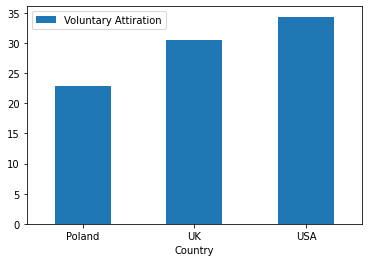

In [219]:
country = ['Poland', 'UK', 'USA']
df = pd.DataFrame({'Country':country, 'Voluntary Attiration':vol_att})
ax = df.plot.bar(x='Country', y='Voluntary Attiration', rot=0)